In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_original = pd.read_csv(r"C:\Users\susha\Downloads\test_lAUu6dG.csv")

In [3]:
# Uploading data 
train = pd.read_csv(r"C:\Users\susha\Downloads\train_ctrUa4K.csv")
test = pd.read_csv(r"C:\Users\susha\Downloads\test_lAUu6dG.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
# The target is loan status which was not included in test data

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.shape,test.shape

((614, 13), (367, 12))

In [10]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())

In [12]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [13]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [15]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())


In [16]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

# Outlier detection

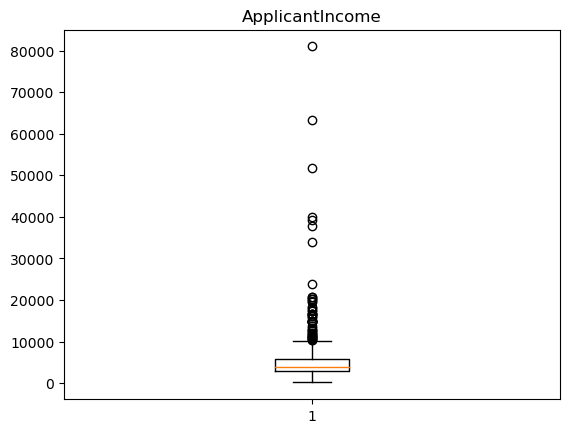

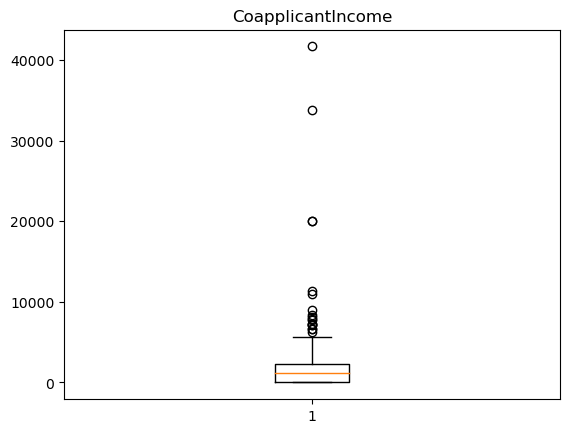

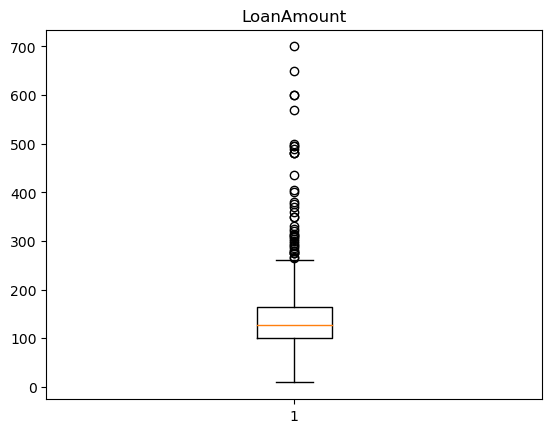

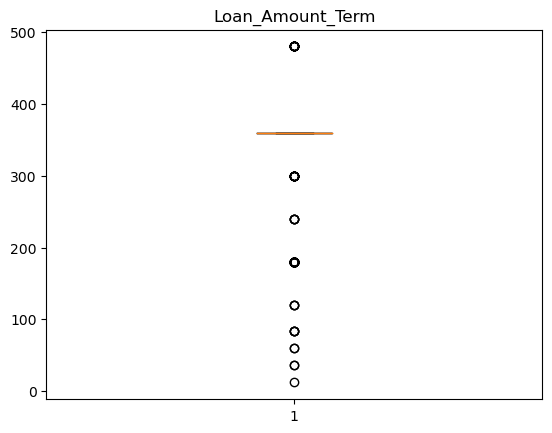

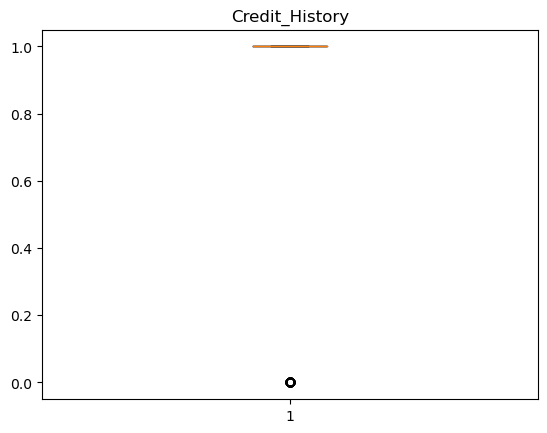

In [17]:
num_cols=['ApplicantIncome','CoapplicantIncome', "LoanAmount",'Loan_Amount_Term','Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(train[i])
    plt.title(i)

In [18]:
Q1 = train['ApplicantIncome'].quantile(0.25)
Q3 = train['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
train['ApplicantIncome']=np.where(train['ApplicantIncome']>upper_whisker,upper_whisker,np.where(train['ApplicantIncome']<lower_whisker,lower_whisker,train['ApplicantIncome']))

In [19]:
Q1 = train['CoapplicantIncome'].quantile(0.25)
Q3 = train['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
train['CoapplicantIncome']=np.where(train['CoapplicantIncome']>upper_whisker,upper_whisker,np.where(train['CoapplicantIncome']<lower_whisker,lower_whisker,train['CoapplicantIncome']))

In [20]:
Q1 = train["LoanAmount"].quantile(0.25)
Q3 = train["LoanAmount"].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
train['LoanAmount']=np.where(train['LoanAmount']>upper_whisker,upper_whisker,np.where(train['LoanAmount']<lower_whisker,lower_whisker,train['LoanAmount']))

In [21]:
Q1 = train['Loan_Amount_Term'].quantile(0.25)
Q3 = train['Loan_Amount_Term'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
train['Loan_Amount_Term']=np.where(train['Loan_Amount_Term']>upper_whisker,upper_whisker,np.where(train['Loan_Amount_Term']<lower_whisker,lower_whisker,train['Loan_Amount_Term']))

In [22]:
Q1 = train['Credit_History'].quantile(0.25)
Q3 = train['Credit_History'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
train['Credit_History']=np.where(train['Credit_History']>upper_whisker,upper_whisker,np.where(train['Credit_History']<lower_whisker,lower_whisker,train['Credit_History']))

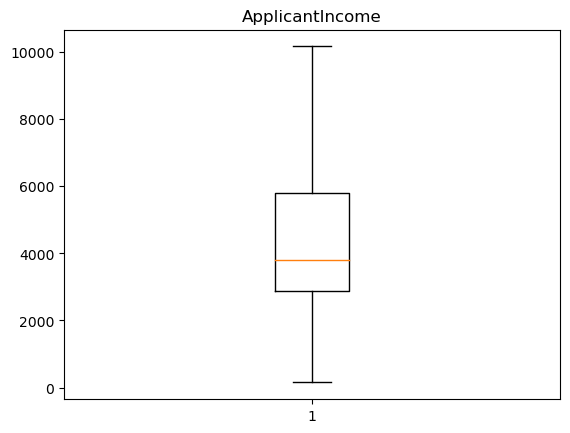

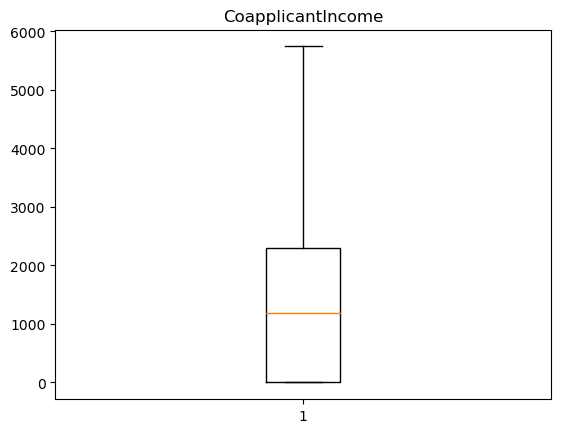

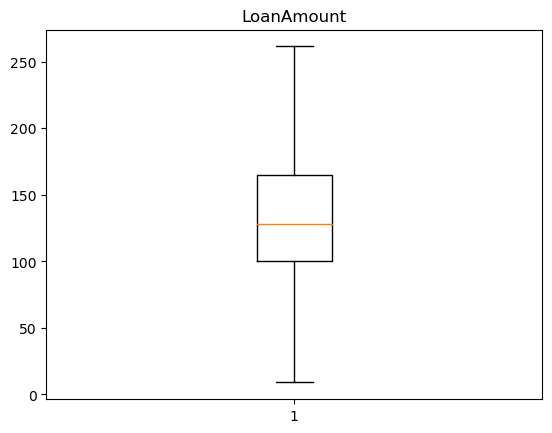

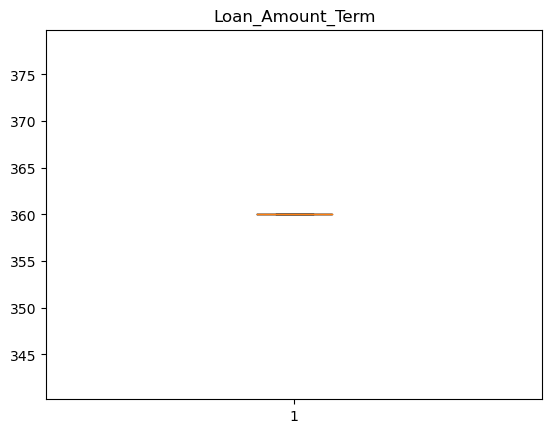

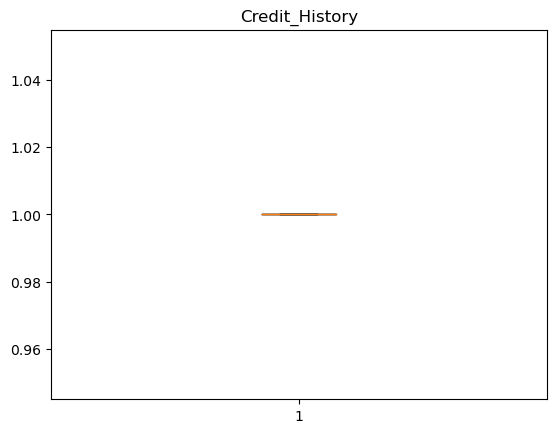

In [23]:
num_cols=['ApplicantIncome','CoapplicantIncome', "LoanAmount",'Loan_Amount_Term','Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(train[i])
    plt.title(i)

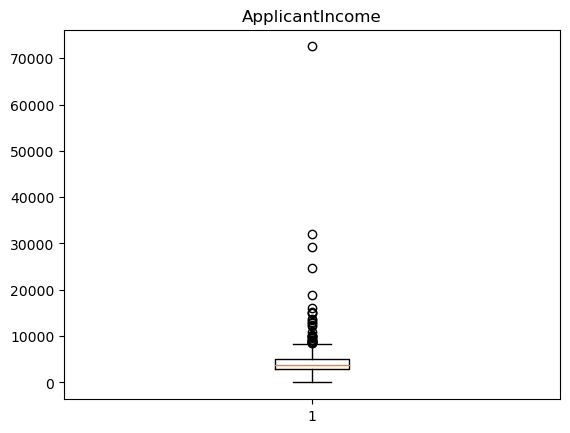

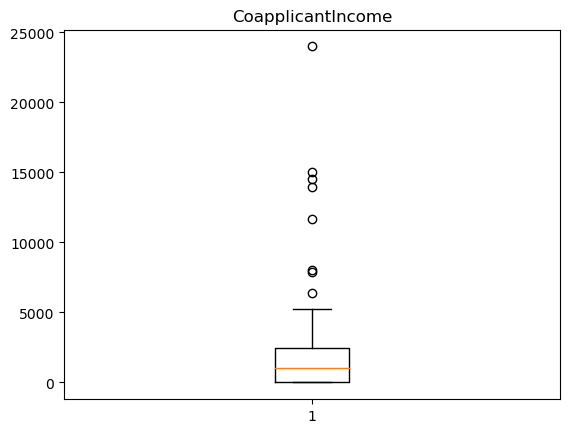

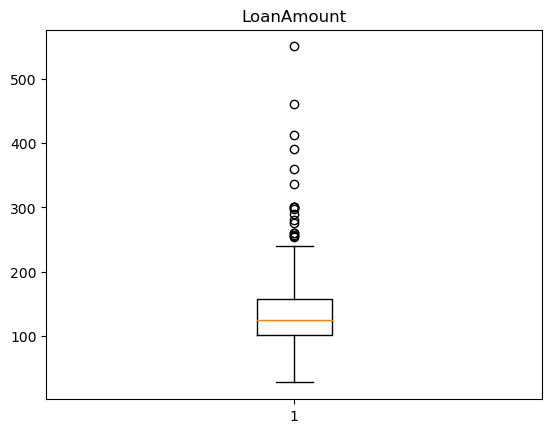

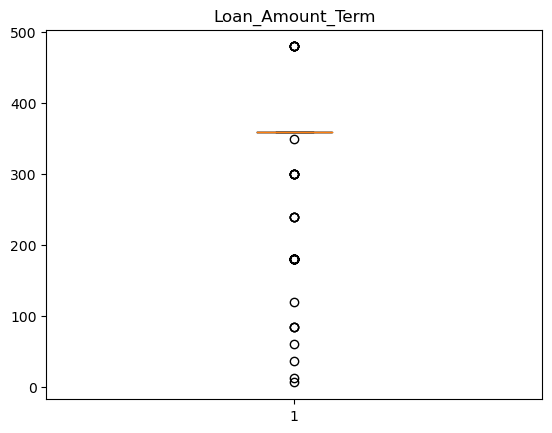

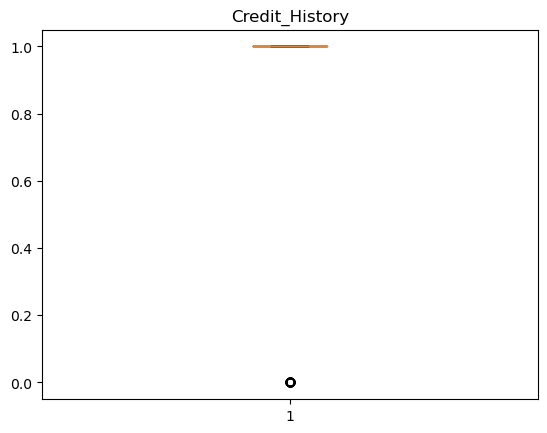

In [24]:
num_cols=['ApplicantIncome','CoapplicantIncome', "LoanAmount",'Loan_Amount_Term','Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(test[i])
    plt.title(i)

In [25]:
Q1 = test['ApplicantIncome'].quantile(0.25)
Q3 = test['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
test['ApplicantIncome']=np.where(test['ApplicantIncome']>upper_whisker,upper_whisker,np.where(test['ApplicantIncome']<lower_whisker,lower_whisker,test['ApplicantIncome']))

In [26]:
Q1 = test["LoanAmount"].quantile(0.25)
Q3 = test["LoanAmount"].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
test['LoanAmount']=np.where(test['LoanAmount']>upper_whisker,upper_whisker,np.where(test['LoanAmount']<lower_whisker,lower_whisker,test['LoanAmount']))

In [27]:
Q1 = test['Loan_Amount_Term'].quantile(0.25)
Q3 = test['Loan_Amount_Term'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
test['Loan_Amount_Term']=np.where(test['Loan_Amount_Term']>upper_whisker,upper_whisker,np.where(test['Loan_Amount_Term']<lower_whisker,lower_whisker,test['Loan_Amount_Term']))

In [28]:
Q1 = test['Credit_History'].quantile(0.25)
Q3 = test['Credit_History'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
test['Credit_History']=np.where(test['Credit_History']>upper_whisker,upper_whisker,np.where(test['Credit_History']<lower_whisker,lower_whisker,test['Credit_History']))

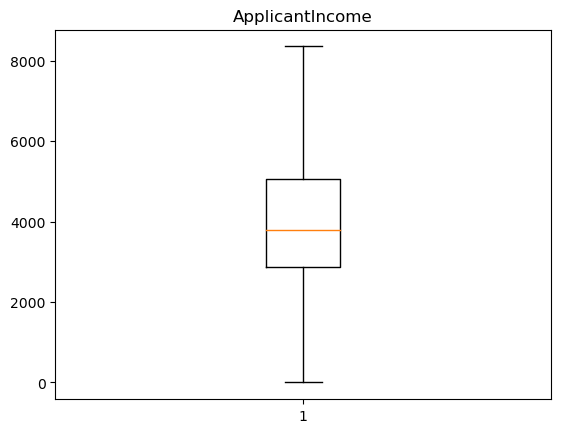

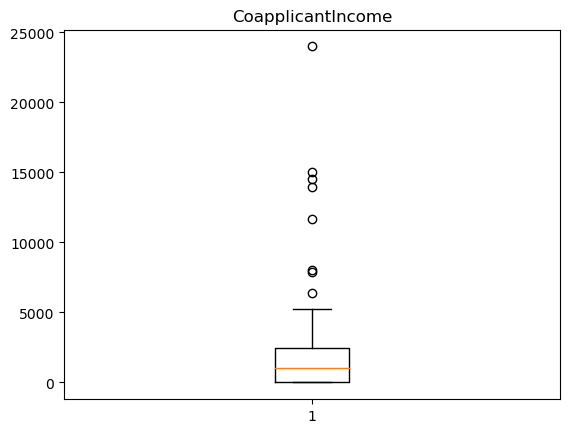

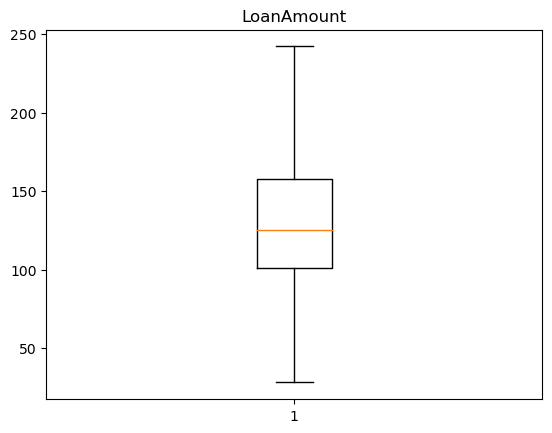

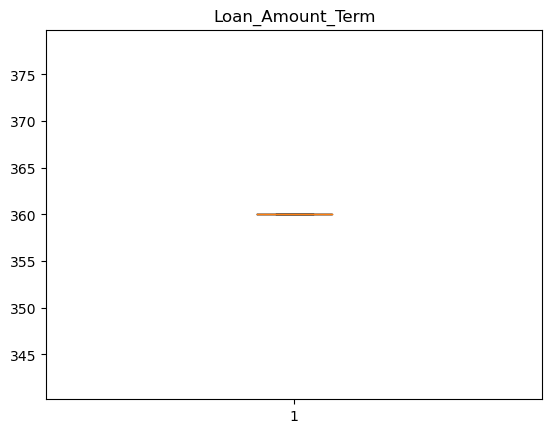

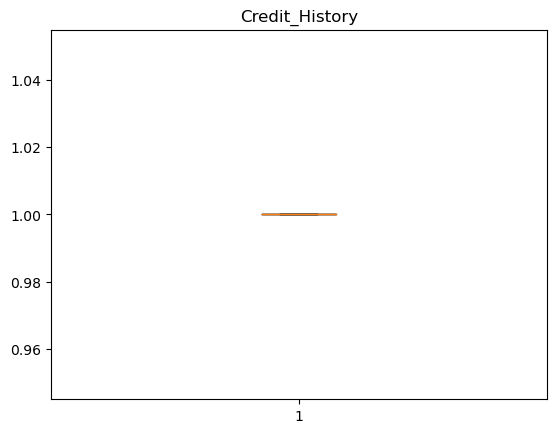

In [29]:
num_cols=['ApplicantIncome','CoapplicantIncome', "LoanAmount",'Loan_Amount_Term','Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(test[i])
    plt.title(i)

# Model making

In [30]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [31]:
X = train.drop('Loan_Status',axis=1) 
y = train['Loan_Status']

In [32]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [35]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [39]:
pred_cv = model.predict(x_cv)

In [40]:
accuracy_score(y_cv,pred_cv)

0.6702702702702703

In [75]:
pred_test = model.predict(test)

In [76]:
submission = pd.read_csv(r"C:\Users\susha\Downloads\sample_submission_49d68Cx.csv")

In [82]:
submission['Loan_Status']= pred_test
submission['Loan_ID'] = test_original["Loan_ID"]

In [83]:
#we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [85]:
df = pd.DataFrame(submission, columns=['Loan_ID','Loan_Status'])

In [86]:
import base64

In [87]:
#write dataframe to file
df. to_csv("test1.csv")  
#read it back
pd.read_csv("test1.csv").head()

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y


In [88]:
create_download_link(df)